# Arbre de décision

Algorithme de reconnaissance de caractère absolument simple. Ce sont les chiffres de 0 à 9, codés en segments, comme sur les vielles calculettes:

![images 10 8-digit]( images/8digit-all.png )

Comment construire la règle de décision pour trouver quel chiffre est affiché en sachant les segments allumés et ceux éteints ?

Les segments sont notés de 'a' à 'f': 

In [39]:
digits = ['abcefg', 'cf', 'acdeg', 'acdfg', 'bdcf', 'abdfg',
          'abdefg', 'acf', 'abcdefg', 'abcdf' ]

On peut se demander quel segment est le plus significatif ?

Ou si on obtient les informations en posant la question, pour chaque segment, 'est-ce que le segment n°A est allumé ?' ... dans quelle ordre demander les segments, afin de poser le moins de question possible ?




## Statistiques

In [40]:
tous = ''.join(digits)
segments = sorted(list( set(tous) ))

freqs = [ tous.count(s) for s in segments ]

print( 'Segment:  %s ' %  '  '.join( segments ) )
print( 'Freqs.:  %s' % freqs )

Segment:  a  b  c  d  e  f  g 
Freqs.:  [8, 6, 8, 7, 4, 9, 6]


On remarque que les segments **e**, **g** et **b** séparent le mieux les chiffres en deux ensembles de même taille...

et aussi que le segment **f** n'est pas utilisé que pour un seul chiffre, le 2.

Combien faut-il de questions ?
* Si on identifie un seul chiffre pour chaque test, il faut **n=10** tests.
* Si on sépare la moitié des chiffres pour chaque test, il faut seulement k tests, avec $n=2^k$.  ??? 

In [41]:
digits.pop(2)

print(len( digits ))

tous = ''.join(digits)
segments = sorted(list( set(tous) ))

freqs = [ tous.count(s) for s in segments ]

print( 'Segment:  %s ' %  '  '.join( segments ) )
print( 'Freqs.:  %s' % freqs )

9
Segment:  a  b  c  d  e  f  g 
Freqs.:  [7, 6, 7, 6, 3, 9, 5]


In [35]:
def abc2vector( s ):
    m = 'abcdefg'
    v = [0]*len(m)
    for l in s:
        v[ m.find(l) ] = 1
    return v

In [486]:
abc2vector( digits[1] )

[0, 0, 1, 0, 0, 1, 0]

In [487]:
import numpy as np

In [488]:
M = np.zeros((len(digits), 7))
for i, digit in enumerate( digits ):
    v = abc2vector( digit )
    M[i, :] = np.array( v )
    
M

array([[ 1.,  1.,  1.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  1.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  1.,  0.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  0.,  1.,  0.],
       [ 1.,  1.,  0.,  1.,  0.,  1.,  1.],
       [ 1.,  1.,  0.,  1.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  0.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  0.,  1.,  0.]])

In [489]:
# Nombre de barres par chiffre:
print( 'Chiffre:%s' % (np.array(range(10))*1.)  )
print( 'Nombre: %s' % M.sum( axis=1 ) )

Chiffre:[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
Nombre: [ 6.  2.  5.  5.  4.  5.  6.  3.  7.  5.]


Cela semble correspondre...

In [490]:
# Nombre de fois qu'une barre est utilisée:
print( 'Barre: [ %s ]' %  '   '.join( list('abcdefg') ) )
print( 'Freq.: %s' % M.sum( axis=0 ) )

Barre: [ a   b   c   d   e   f   g ]
Freq.: [ 8.  6.  8.  7.  4.  9.  6.]


on remarque que les barre **e**, **g** et **b** séparent le mieux les chiffres en deux ensembles de même taille...

et aussi que la barre **f** n'est pas utilisée que pour un seul chiffre (le 2)

* si on sort un seul à chaque test, il faut **n** tests
* si on sépare la moitié il faut seulement k, n=2^k tests

In [491]:
digit2code = dict(zip( range(10), digits ))

def crible( digits, segment ):
    oui, non = [], []
    for d in digits:
        code = digit2code[d]
        if segment in code:
            oui.append(d)
        else:
            non.append(d)
    return oui, non

In [492]:
D = range(10)

In [493]:
crible( D, 'f' )

([0, 1, 3, 4, 5, 6, 7, 8, 9], [2])

In [494]:
D_e = crible( D, 'e' )
print( D_e )

([0, 2, 6, 8], [1, 3, 4, 5, 7, 9])


In [495]:
D_g = crible( D, 'g' )
print( D_g )

([0, 2, 3, 5, 6, 8], [1, 4, 7, 9])


In [496]:
D_e0b = crible( crible( D, 'e' )[0], 'b' )
print( D_e0b )

([0, 6, 8], [2])


In [497]:
def get_proba(D):
    segments = ''.join( [ digit2code[d] for d in D ] )
    segment_unique = set( list(segments) )
    proba = {}
    for s in list(segment_unique):
        proba[s] = segments.count(s)/len(D)
    return proba

In [498]:
get_proba(D)

{'a': 0.8, 'b': 0.6, 'c': 0.8, 'd': 0.7, 'e': 0.4, 'f': 0.9, 'g': 0.6}

In [499]:
def Gini( proba ):
    gini = {}
    for k, v in proba.items():
        gini[k] = 2*v*(1-v)
    return gini

def get_Gini( D ):
    return sorted( [u for u in Gini(get_proba(D)).items()], key=lambda x:x[1] ,reverse=True)

In [500]:
get_Gini(D)

[('b', 0.48),
 ('g', 0.48),
 ('e', 0.48),
 ('d', 0.42000000000000004),
 ('a', 0.31999999999999995),
 ('c', 0.31999999999999995),
 ('f', 0.17999999999999997)]

In [501]:
get_proba(D_e[1])

{'a': 0.6666666666666666,
 'b': 0.5,
 'c': 0.8333333333333334,
 'd': 0.6666666666666666,
 'f': 1.0,
 'g': 0.3333333333333333}

Nous pouvons maintenant contruire un arbre de décision, en choisisant à chaque itération le segment maximisant la séparation, c.a.d. le coéfficient de Gini

In [502]:
racine = get_Gini(D)[0][0]
print( racine )

b


In [503]:
def grow_edge( D, parent=''):
    critere = get_Gini(D)[0][0]
    print( get_Gini(D)[0] )
    
    edges = [[parent, parent+critere]]
 
    branches12 = crible(D, critere)
    for branche in branches12:
        if len(branche)>1:
            sous_arbre = grow_edge( branche, parent=parent+critere )
            edges.extend( sous_arbre )

        else: # feuille
            edges.extend( [[parent+critere, str(f)] for f in branche] )

    return edges

In [479]:
grow_edge(D)

('b', 0.48)
('e', 0.5)
('d', 0.4444444444444445)
('c', 0.5)
('a', 0.4444444444444445)
('c', 0.5)
('d', 0.5)
('e', 0.5)
('a', 0.5)


[['', 'b'],
 ['b', 'be'],
 ['be', 'bed'],
 ['bed', 'bedc'],
 ['bedc', '8'],
 ['bedc', '6'],
 ['bed', '0'],
 ['be', 'bea'],
 ['bea', 'beac'],
 ['beac', '9'],
 ['beac', '5'],
 ['bea', '4'],
 ['b', 'bd'],
 ['bd', 'bde'],
 ['bde', '2'],
 ['bde', '3'],
 ['bd', 'bda'],
 ['bda', '7'],
 ['bda', '1']]

In [480]:
def edges2nodes( E ):
    nodes = set()
    for a, b in E :
        if a and b:
            nodes.add(a)
            nodes.add(b)
    return nodes

In [481]:
edges = grow_edge(D)

('b', 0.48)
('e', 0.5)
('d', 0.4444444444444445)
('c', 0.5)
('a', 0.4444444444444445)
('c', 0.5)
('d', 0.5)
('e', 0.5)
('a', 0.5)


In [482]:
graph = gv.Digraph(format='svg')

nodes = edges2nodes( edges )
for n in list(nodes):
    graph.node(n)
    
for a, b in edges:
    if a and b:
        graph.edge(a, b)

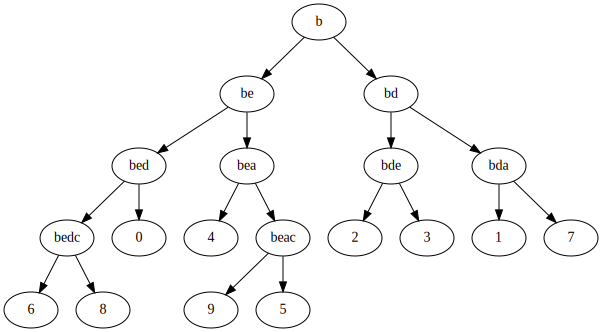

In [483]:
graph

* **f** et **g** ne sont pas dans l'arbre
* Est-ce que c'est l'arbre le plus petit possible ? oui  (10 feuilles) mais il n'est pas unique (score Gini ex-aequo)
* et avec du bruit ? un segment défaillant...

In [515]:
graph = gv.Digraph(format='svg')

def grow_graph( D, parent=''):
    
    critere = get_Gini(D)[0][0]
    print( get_Gini(D)[0] )
    
    #edges = [[parent, parent+critere]]
    #graph.node( parent )
    graph.node(  parent+critere, label=critere+'?' )
    graph.edge(parent, parent+critere)
    
    branches12 = crible(D, critere)
    for branche in branches12:
        if len(branche)>1:
            sous_arbre = grow_graph( branche, parent=parent+critere )
            #edges.extend( sous_arbre )

        else: # feuille
            #edges.extend( [[parent+critere, str(f)] for f in branche] )
            graph.node( str(branche[0]) )
            graph.edge(parent+critere, str(branche[0]))

    return edges

('b', 0.48)
('e', 0.5)
('d', 0.4444444444444445)
('c', 0.5)
('a', 0.4444444444444445)
('c', 0.5)
('d', 0.5)
('e', 0.5)
('a', 0.5)


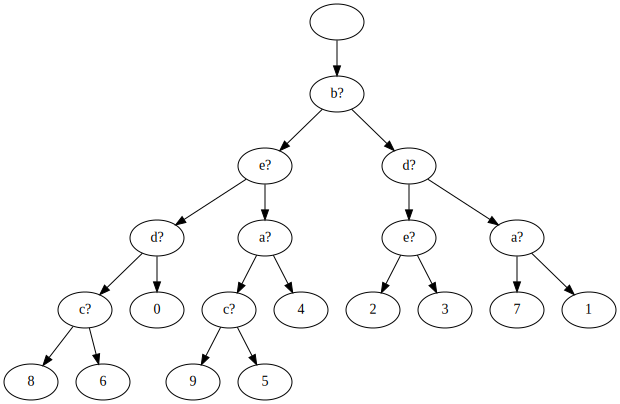

In [516]:
grow_graph( D )
graph

## Arbres en python

In [87]:
import graphviz as gv
# see blog:  http://matthiaseisen.com/articles/graphviz/
# doc: https://graphviz.readthedocs.io/en/stable/

In [88]:
# Construit l'arbre dans Graphviz
# et l'affiche

def construct( T, root ):
    G = gv.Digraph(format='svg')
    visited = []
    def visit(n):
        if n in visited:
            raise NameError('boucle')
        visited.append(n)
        
        if n in T:
            G.node(n, label=n+'?')
            G.edge(n, T[n][0], label='L')
            G.edge(n, T[n][1], label='R')
            visit( T[n][0] )
            visit( T[n][1] )
        else:
            G.node(n, label=n+'.')
            
    visit(root)
    
    return G

### Notation
parent: (enfant1, enfant2)

In [94]:
T = {'a':('1', 'b'), 'b':('2', '3')}

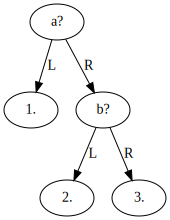

In [95]:
construct( T, 'a' )

In [77]:
'e' in T

False

In [28]:
g1 = gv.Digraph(format='svg')
g1.node('a?')
g1.node('1')
g1.node('3')
g1.edge('a?', '1', label='oui')
g1.edge('a?', '3', label='non')

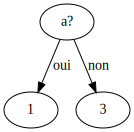

In [29]:
g1

## Brouillon

In [84]:
def get_nodes(T):
    nodes = set()
    for node, childrens in T.items():
        nodes.add(node)
        nodes.add(childrens[0])
        nodes.add(childrens[1])
    return nodes
